In [3]:
import os

In [9]:
%pwd

'd:\\Angus_Issues\\NorthCarolina_CameroonChapter_AngusIssues\\research'

In [10]:
os.chdir("../")

In [11]:
# Install necessary packages if not already installed
!pip install pandas numpy scikit-learn statsmodels

# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Load your time series data
data = pd.read_csv('simulated_dataNEw.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows to verify
print(data.head())

# Check the data types of each column
print(data.dtypes)

# Drop non-numeric columns if necessary
if 'Cow' in data.columns:
    data.drop(columns=['Cow'], inplace=True)


            Unnamed: 0    Cow  Body Weight (kg)  Daily Hay Dry matter (kg)  \
Date                                                                         
2022-01-01           0  Cow 1        391.030076                  15.097939   
2022-01-02           1  Cow 1        497.429880                  25.603158   
2022-01-03           2  Cow 1        383.263409                  24.392390   
2022-01-04           3  Cow 1        420.832973                  13.501311   
2022-01-05           4  Cow 1        460.102113                  17.936188   

            hay intake fresh  
Date                          
2022-01-01         25.130865  
2022-01-02         37.378380  
2022-01-03         61.928021  
2022-01-04         53.642013  
2022-01-05         52.433684  
Unnamed: 0                     int64
Cow                           object
Body Weight (kg)             float64
Daily Hay Dry matter (kg)    float64
hay intake fresh             float64
dtype: object


In [12]:
# Group by date and take the mean of 'Body Weight (kg)' for each date
data = data.groupby(data.index).mean()

# Fill missing values using forward fill method
data['Body Weight (kg)'].ffill(inplace=True)

# Ensure the index is sorted and set frequency to daily
data = data.sort_index()
data = data.asfreq('D')

# Create a time feature
data['Time'] = np.arange(len(data))


In [13]:
!pip install pandas scikit-learn


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
data = pd.read_csv('simulated_dataNEw.csv', parse_dates=['Date'], index_col='Date')

# Keep only the 'Body Weight (kg)' column
data = data[['Body Weight (kg)']]

# Remove duplicates by aggregating (e.g., taking the mean for each date)
data = data.groupby(data.index).mean()

# Ensure the index is sorted
data = data.sort_index()

# Fill any missing values
data['Body Weight (kg)'].ffill(inplace=True)

# Prepare the data for linear regression
data['Day'] = (data.index - data.index[0]).days  # Convert dates to a numerical format


In [16]:
# Define features and target variable
X = data[['Day']]
y = data['Body Weight (kg)']


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Print the model coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Coefficient: -0.016327642986250786
Intercept: 452.4608537664357


In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 237.78757459704664


In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load and preprocess data
data = pd.read_csv('simulated_dataNEw.csv', parse_dates=['Date'], index_col='Date')

# Keep only the 'Body Weight (kg)' column
data = data[['Body Weight (kg)']]

# Remove duplicates by aggregating (e.g., taking the mean for each date)
data = data.groupby(data.index).mean()

# Ensure the index is sorted and set frequency
data = data.sort_index()
data = data.asfreq('D')  # Assuming daily data

# Fill any missing values if necessary
data['Body Weight (kg)'].ffill(inplace=True)  # Forward fill missing values

# Create a numerical feature for linear regression
data['Day'] = np.arange(len(data))

# Define features and target variable
X = data[['Day']]
y = data['Body Weight (kg)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate future index (10 days ahead)
future_days = np.arange(len(data), len(data) + 10).reshape(-1, 1)

# Make predictions for the next 10 days
future_predictions = model.predict(future_days)

# Create a DataFrame for future predictions
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(days=1), periods=10, freq='D')
future_forecast = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Body Weight (kg)'])

print(future_forecast)





            Predicted Body Weight (kg)
2022-03-02                  451.481195
2022-03-03                  451.464868
2022-03-04                  451.448540
2022-03-05                  451.432212
2022-03-06                  451.415885
2022-03-07                  451.399557
2022-03-08                  451.383229
2022-03-09                  451.366902
2022-03-10                  451.350574
2022-03-11                  451.334246


d:\Angus_Issues\NorthCarolina_CameroonChapter_AngusIssues\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
!pip install pandas scikit-learn statsmodels



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [25]:
# Load the data
data = pd.read_csv('simulated_dataNEw.csv', parse_dates=['Date'], index_col='Date')

# Keep only the 'Body Weight (kg)' column
data = data[['Body Weight (kg)']]

# Remove duplicates by aggregating (e.g., taking the mean for each date)
data = data.groupby(data.index).mean()

# Ensure the index is sorted
data = data.sort_index()

# Fill any missing values
data['Body Weight (kg)'].ffill(inplace=True)


In [26]:
train_start_date = '2022-01-01'
train_end_date = '2022-02-28'
test_start_date = '2022-03-01'
test_end_date = '2022-03-10'

train = data[train_start_date:train_end_date].copy()
test = data[test_start_date:test_end_date].copy()

# Create time variable for Linear Regression
train.loc[:, 'Time'] = np.arange(len(train))
test.loc[:, 'Time'] = np.arange(len(train), len(train) + len(test))


In [27]:
X_train = train[['Time']]
y_train = train['Body Weight (kg)']
X_test = test[['Time']]
y_test = test['Body Weight (kg)']


In [28]:
# Ensure the index has a frequency
train.index = pd.date_range(start=train.index[0], end=train.index[-1], freq='D')
test.index = pd.date_range(start=test.index[0], end=test.index[-1], freq='D')

# ARIMA model setup
p, d, q = 1, 0, 1
arima_model = ARIMA(train['Body Weight (kg)'], order=(p, d, q))
arima_model_fit = arima_model.fit()

# Generate forecast for ARIMA
arima_forecast = arima_model_fit.forecast(steps=len(test))
arima_y_pred = pd.Series(arima_forecast, index=test.index)

# Print the forecasted values
print(arima_y_pred)



2022-03-01    447.470775
Freq: D, dtype: float64


In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Generate forecast for Linear Regression
lr_y_pred = lr_model.predict(X_test)
lr_y_pred = pd.Series(lr_y_pred, index=test.index)


In [30]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('simulated_dataNEw.csv', parse_dates=['Date'], index_col='Date')

# Keep only the 'Body Weight (kg)' column and ensure no duplicates
data = data[['Body Weight (kg)']].groupby(data.index).mean()

# Ensure the index is sorted and has a daily frequency
data = data.sort_index()
data = data.asfreq('D')

# Fill any missing values
data['Body Weight (kg)'].ffill(inplace=True)

# Print the first few rows to ensure data is loaded correctly
print(data.head())


            Body Weight (kg)
Date                        
2022-01-01        423.547511
2022-01-02        438.493122
2022-01-03        458.381833
2022-01-04        446.847448
2022-01-05        456.503072


In [31]:
# Split the data into training and testing sets
train = data['2022-01-01':'2022-02-28']
test = data['2022-03-01':'2022-03-10']

# Print the shapes of the train and test sets to ensure correct splitting
print(train.shape, test.shape)


(59, 1) (1, 1)


In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
p, d, q = 1, 0, 1
arima_model = ARIMA(train['Body Weight (kg)'], order=(p, d, q))
arima_model_fit = arima_model.fit()

# Generate forecast for ARIMA
arima_forecast = arima_model_fit.forecast(steps=len(test))
arima_y_pred = pd.Series(arima_forecast, index=test.index)

# Print the ARIMA forecast
print(arima_y_pred)


Date
2022-03-01    447.470775
Freq: D, dtype: float64


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate performance metrics for ARIMA
arima_mse = mean_squared_error(test['Body Weight (kg)'], arima_y_pred)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(test['Body Weight (kg)'], arima_y_pred)

print(f"ARIMA MSE: {arima_mse}")
print(f"ARIMA RMSE: {arima_rmse}")
print(f"ARIMA MAE: {arima_mae}")


ARIMA MSE: 7.245292986906155
ARIMA RMSE: 2.691708191261853
ARIMA MAE: 2.691708191261853


In [35]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess data
data = pd.read_csv('simulated_dataNEw.csv', parse_dates=['Date'], index_col='Date')

# Keep only the 'Body Weight (kg)' column
data = data[['Body Weight (kg)']]

# Remove duplicates by aggregating (e.g., taking the mean for each date)
data = data.groupby(data.index).mean()

# Ensure the index is sorted and set frequency
data = data.sort_index()
data = data.asfreq('D')  # Assuming daily data

# Fill any missing values if necessary
data['Body Weight (kg)'].ffill(inplace=True)  # Forward fill missing values

# Fit ARIMA model
p, d, q = 1, 0, 1  # Example parameters
model = ARIMA(data['Body Weight (kg)'], order=(p, d, q))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Generate future index (10 days ahead)
future_index = pd.date_range(start=data.index[-1] + pd.DateOffset(days=1), periods=10, freq='D')

# Generate forecast
forecast = model_fit.forecast(steps=10)

# Create forecast series with future index
forecast_series = pd.Series(forecast, index=future_index)
print(forecast_series)


                               SARIMAX Results                                
Dep. Variable:       Body Weight (kg)   No. Observations:                   60
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -232.419
Date:                Thu, 08 Aug 2024   AIC                            472.839
Time:                        09:55:46   BIC                            481.216
Sample:                    01-01-2022   HQIC                           476.116
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        450.3815      1.732    260.018      0.000     446.987     453.776
ar.L1         -0.6463      0.197     -3.274      0.001      -1.033      -0.259
ma.L1          0.8631      0.135      6.407      0.0

In [36]:
# Calculate performance metrics for ARIMA
arima_mse = mean_squared_error(test['Body Weight (kg)'], arima_y_pred)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(test['Body Weight (kg)'], arima_y_pred)

print(f"ARIMA MSE: {arima_mse}")
print(f"ARIMA RMSE: {arima_rmse}")
print(f"ARIMA MAE: {arima_mae}")

# Calculate performance metrics for Linear Regression
lr_mse = mean_squared_error(test['Body Weight (kg)'], lr_y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(test['Body Weight (kg)'], lr_y_pred)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression MAE: {lr_mae}")


ARIMA MSE: 7.245292986906155
ARIMA RMSE: 2.691708191261853
ARIMA MAE: 2.691708191261853
Linear Regression MSE: 0.027582869596254053
Linear Regression RMSE: 0.16608091279931614
Linear Regression MAE: 0.16608091279931614


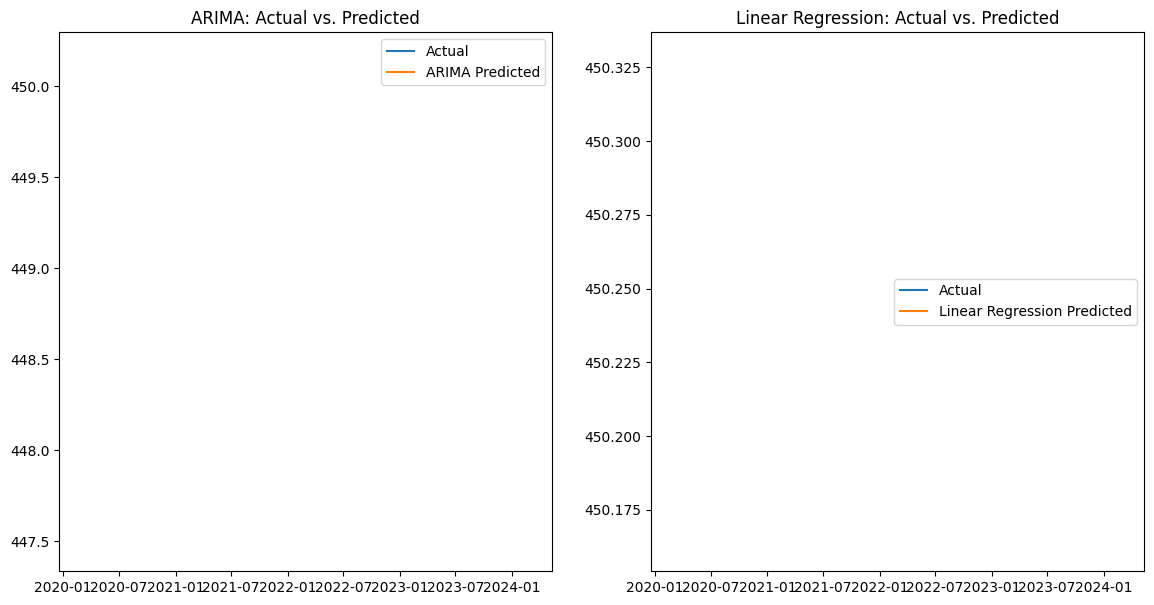

In [37]:
plt.figure(figsize=(14, 7))

# Actual vs. Predicted for ARIMA
plt.subplot(1, 2, 1)
plt.plot(test.index, test['Body Weight (kg)'], label='Actual')
plt.plot(test.index, arima_y_pred, label='ARIMA Predicted')
plt.title('ARIMA: Actual vs. Predicted')
plt.legend()

# Actual vs. Predicted for Linear Regression
plt.subplot(1, 2, 2)
plt.plot(test.index, test['Body Weight (kg)'], label='Actual')
plt.plot(test.index, lr_y_pred, label='Linear Regression Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()

plt.show()